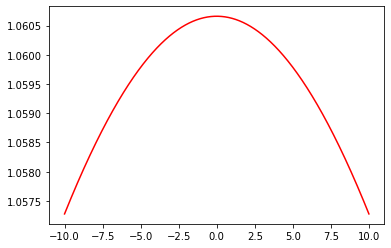

In [13]:
# -*- coding: utf-8 -*-
"""
Created on Sun Mar 13 10:22:25 2022

@author: lamia
"""
from importlib.resources import path
import matplotlib.pyplot as plt
import numpy as np
import pyarrow.parquet as pq
import os 

#A = Magnitude
df = pq.read_table("C:\Kanti\Microlensing\LC-Pakete\ztf_001896_zr_c10_q3_dr7.parquet").to_pandas()
lc1 = df.loc[2] 
mag = lc1['mag']
date = lc1['hmjd']

t0=0 #Zeitpunkt max. Helligkeit
umin=2
tE=25 #Zeitdauer, um Einstein-Radius zurückzulegen

t = np.linspace(-10, 10, 20000) #(start, end, Anz. Striche zwischen start und end) -> x-Achse
#freie Parameter hängen von t ab -> verändern sich mit der Zeit -> Körper bewegen sich
count = 0 

def A(t):  #Helligkeit A abhängig von u, u abhängig von r_e, r_e abhängig von freien Parametern,
# welche von t abhängig sind

    u = np.sqrt(umin**2 + ((t-t0)/tE)**2)
    A = (u**2 + 2) / (u*np.sqrt(u**2 + 4))
    return A 
#def mag(A): #Umrechnung Helligkeit in Magnitude
    
    

plt.figure()
plt.plot(t, A(t),"-", color = "red")
plt.show()